In [44]:
import pandas as pd
import numpy as np

In [170]:
df=pd.read_csv('/Users/praveesha/Desktop/IS733/HW/HW1/Baltimore911.csv', low_memory=False)

In [47]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


## Data Profile Report
#### Gathering information of each attribute, including number of rows and columns, level of missing values, and type of attributes

In [50]:
from ydata_profiling import ProfileReport

In [51]:
profile = ProfileReport(df, title="Profiling Report")

In [52]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
df.dtypes

CrimeDate           object
CrimeTime           object
CrimeCode           object
Location            object
Description         object
Inside/Outside      object
Weapon              object
Post                object
District            object
Neighborhood        object
Longitude          float64
Latitude           float64
Location 1         float64
Premise             object
vri_name1           object
Total Incidents      int64
dtype: object

## Numeric Attributes
#### For each column, displaying - min, max, mean, median, and standard deviation

In [55]:
# Step 1: Filter only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Step 2: Calculate statistics for each numeric column
statistics = numeric_columns.agg(['min', 'max', 'mean', 'median', 'std']).transpose()

# Step 3: Display the results in tabular format
print(statistics)


                       min        max       mean     median       std
Longitude       -81.529189 -76.383228 -76.617452 -76.613977  0.043734
Latitude         37.577262  39.661332  39.306746  39.302672  0.029658
Location 1             NaN        NaN        NaN        NaN       NaN
Total Incidents   1.000000   1.000000   1.000000   1.000000  0.000000


## Categorical Attributes
#### For each column, displaying - 
#### (a) Count of unique values
#### (b) Top 3 attributes values with largest count

In [57]:
# Step 1: Identify discrete (categorical) attributes
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Step 2: Create a list to hold results
results = []

# Step 3: Calculate unique values and top 3 values for each categorical column
for column in categorical_columns:
    unique_count = df[column].nunique()
    top_values = df[column].value_counts().nlargest(3)
    results.append({
        'Attribute': column,
        'Unique Values': unique_count,
        'Top 3 Values': top_values.index.tolist(),
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Step 4: Set the index to the 'Attribute' column
results_df.set_index('Attribute', inplace=True)

# Step 5: Display results in tabular format
print(results_df)


                Unique Values  \
Attribute                       
CrimeDate                2300   
CrimeTime                1475   
CrimeCode                  81   
Location                27064   
Description                14   
Inside/Outside              4   
Weapon                      5   
Post                      259   
District                   10   
Neighborhood              278   
Premise                   125   
vri_name1                   8   

                                                     Top 3 Values  
Attribute                                                          
CrimeDate                    [04/27/2015, 06/05/2016, 12/20/2018]  
CrimeTime                          [18:00:00, 17:00:00, 12:00:00]  
CrimeCode                                            [4E, 6D, 5A]  
Location        [1500 RUSSELL ST, 3500 BOSTON ST, 2400 FREDERI...  
Description                   [LARCENY, COMMON ASSAULT, BURGLARY]  
Inside/Outside                                    [O, I, Outs

## Level of missingness for each attribute

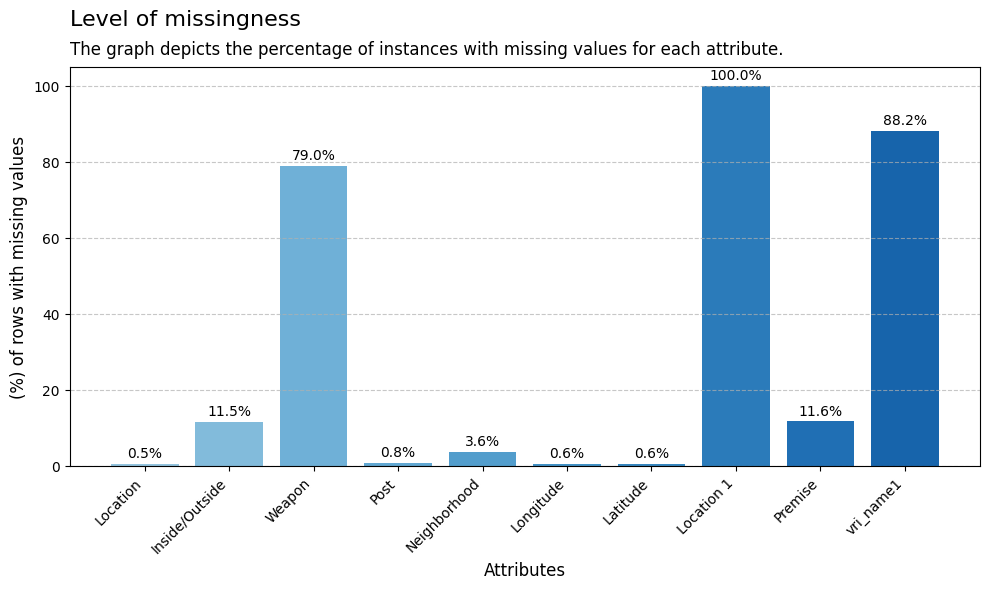

In [293]:
import matplotlib.pyplot as plt
%matplotlib inline

# Step 1: Calculate the percentage of missing values for each attribute
# Consider both NaN and empty strings as missing values
missing_percentage = ((df.isnull() | (df == '')).mean()) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Filter to only show attributes with missing values

# Step 2: Create a bar graph
plt.figure(figsize=(10, 6))

# Set the color map for shading
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(missing_percentage)))  # Different shades of blue

# Step 3: Plotting the bar graph
bars = plt.bar(missing_percentage.index, missing_percentage, color=colors)

# Adding legends
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')

# Step 4: Customizing the graph
plt.title('Level of missingness', fontsize=16, pad=30, loc='left', x=0)
# Add text aligned to the left, slightly below the title
plt.text(x=0.075, y=plt.gca().get_position().y1 + 0.02, s='The graph depicts the percentage of instances with missing values for each attribute.', ha='left', fontsize=12, transform=plt.gcf().transFigure)
plt.xlabel('Attributes', fontsize=12)
plt.ylabel('(%) of rows with missing values', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

 ## The temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence aggregating from all geo-locations

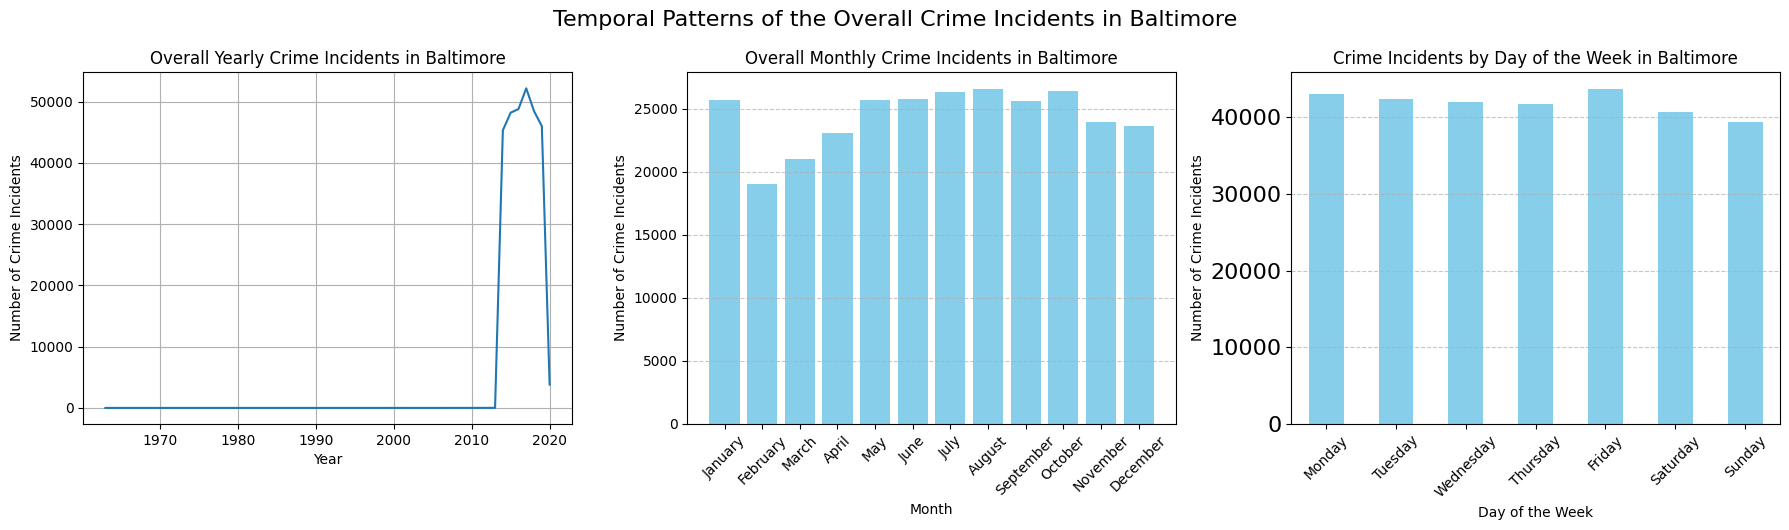

In [63]:
import matplotlib.pyplot as plt

# Combine CrimeDate and CrimeTime into a single datetime column
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDate'] + ' ' + df['CrimeTime'])

# Extract year, month, and day of the week
df['Year'] = df['CrimeDateTime'].dt.year
df['Month'] = df['CrimeDateTime'].dt.month
df['MonthName'] = df['CrimeDateTime'].dt.month_name()  # Get month names
df['DayOfWeek'] = df['CrimeDateTime'].dt.day_name()  # Returns names like 'Monday', 'Tuesday', etc.

# Aggregate data
# Yearly aggregation
yearly_data = df.groupby('Year').size()

# Monthly aggregation (overall across all years)
monthly_data = df.groupby('Month').size()

# Weekly aggregation (using day of the week)
weekly_data = df['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create the plots
plt.figure(figsize=(18, 5))

# Plot 1: Yearly line graph
plt.subplot(1, 3, 1)
plt.plot(yearly_data.index, yearly_data.values)
plt.title('Overall Yearly Crime Incidents in Baltimore')
plt.xlabel('Year')
plt.ylabel('Number of Crime Incidents')
plt.grid()

# Plot 2: Monthly bar graph (overall across all years)
plt.subplot(1, 3, 2)
plt.bar(monthly_data.index, monthly_data.values, color='skyblue')
plt.title('Overall Monthly Crime Incidents in Baltimore')
plt.xlabel('Month')
plt.ylabel('Number of Crime Incidents')


# Create a list of month names corresponding to each month (1-12)
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.xticks(monthly_data.index, month_names, rotation=45)  # Use month names for x-ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Day of the week bar graph
plt.subplot(1, 3, 3)
weekly_data.plot(kind='bar', color='skyblue')
plt.title('Crime Incidents by Day of the Week in Baltimore')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crime Incidents')
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.suptitle('Temporal Patterns of the Overall Crime Incidents in Baltimore', fontsize=16, y=1.05)
plt.show()


#### Line Graph plots

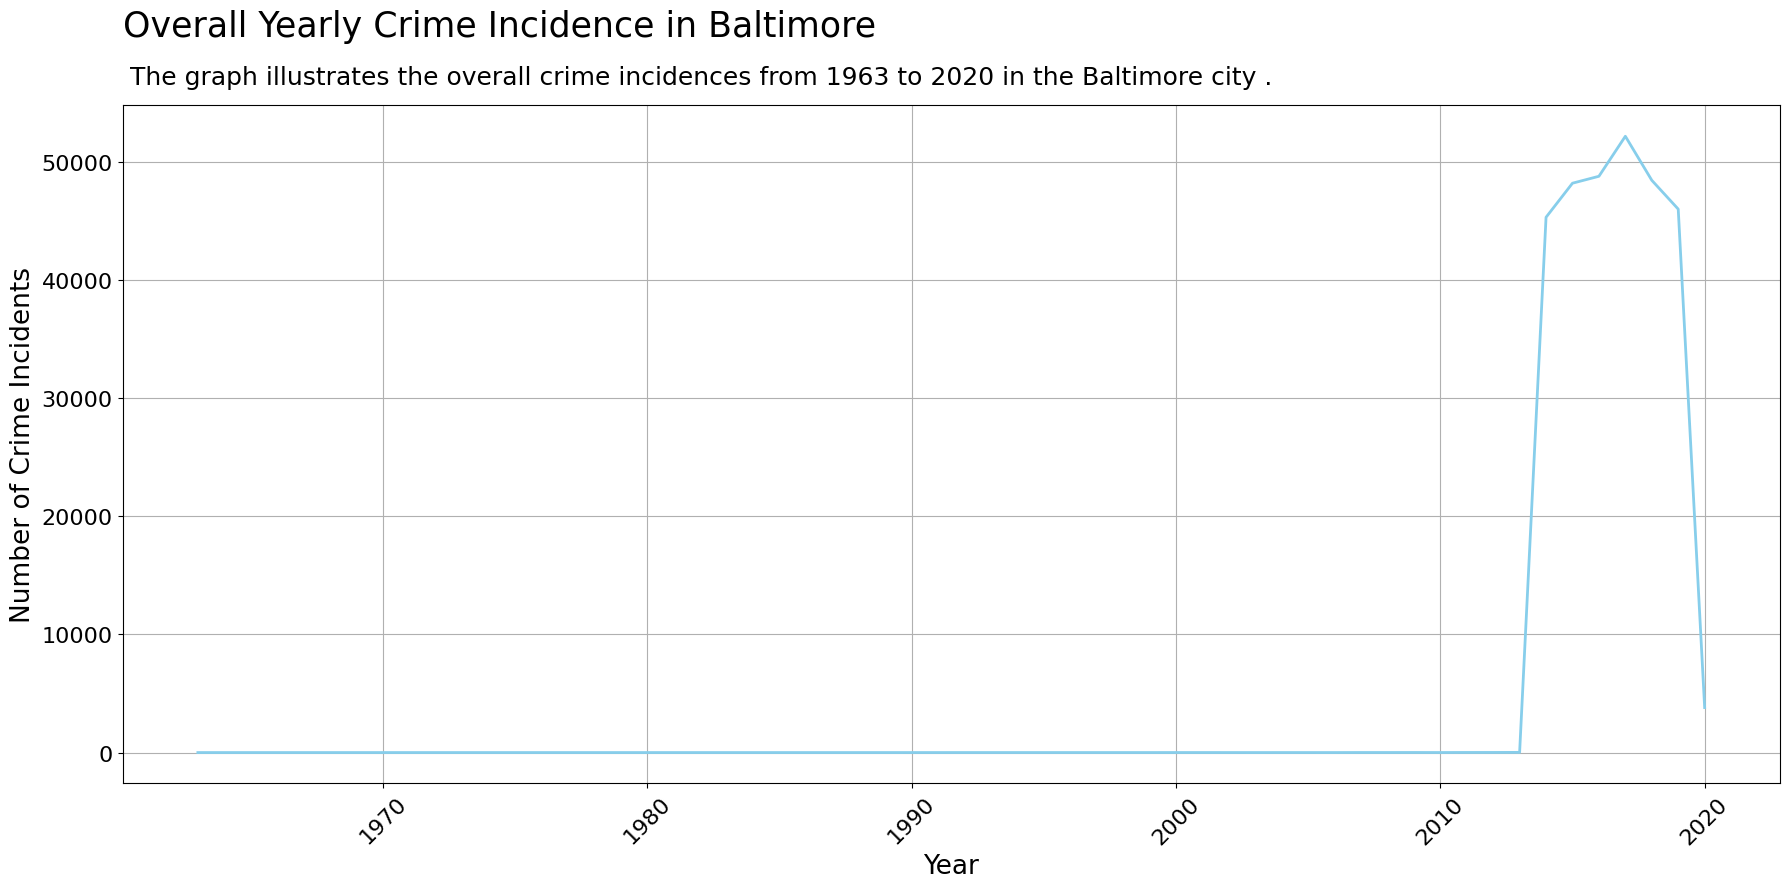

In [301]:
import matplotlib.pyplot as plt

# Combine CrimeDate and CrimeTime into a single datetime column
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDate'].astype(str) + ' ' + df['CrimeTime'])

# Extract year, month, and day of the week
df['Year'] = df['CrimeDateTime'].dt.year
df['Month'] = df['CrimeDateTime'].dt.month
df['MonthName'] = df['CrimeDateTime'].dt.month_name()  # Get month names
df['DayOfWeek'] = df['CrimeDateTime'].dt.day_name()  # Returns names like 'Monday', 'Tuesday', etc.

# Aggregate data
# Yearly aggregation
yearly_data = df.groupby('Year').size()

# Monthly aggregation (overall across all years)
monthly_data = df.groupby('Month').size()

# Weekly aggregation (using day of the week)
weekly_data = df['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create the plots
plt.figure(figsize=(18, 9))

# Plot 1: Yearly line graph
#plt.subplot(1, 3, 1)
plt.plot(yearly_data.index, yearly_data.values, color='skyblue', linestyle='-', linewidth=2, markersize=6)
plt.title('Overall Yearly Crime Incidence in Baltimore', fontsize=25, pad=50, loc='left', x=0)
plt.text(x=0.075, y=plt.gca().get_position().y1 + 0.02, s='The graph illustrates the overall crime incidences from 1963 to 2020 in the Baltimore city .', ha='left', fontsize=18, transform=plt.gcf().transFigure)
plt.xlabel('Year', fontsize=19)
plt.ylabel('Number of Crime Incidents', fontsize=19)
plt.xticks(rotation=45, fontsize=16)  # Horizontal x-ticks with increased size
plt.yticks(fontsize=16)  # Increase y-ticks size
plt.grid()

# Adjust layout
plt.tight_layout()
#plt.suptitle('Overall Crime Incidents in Baltimore', fontsize=16, y=1.05)
plt.show()


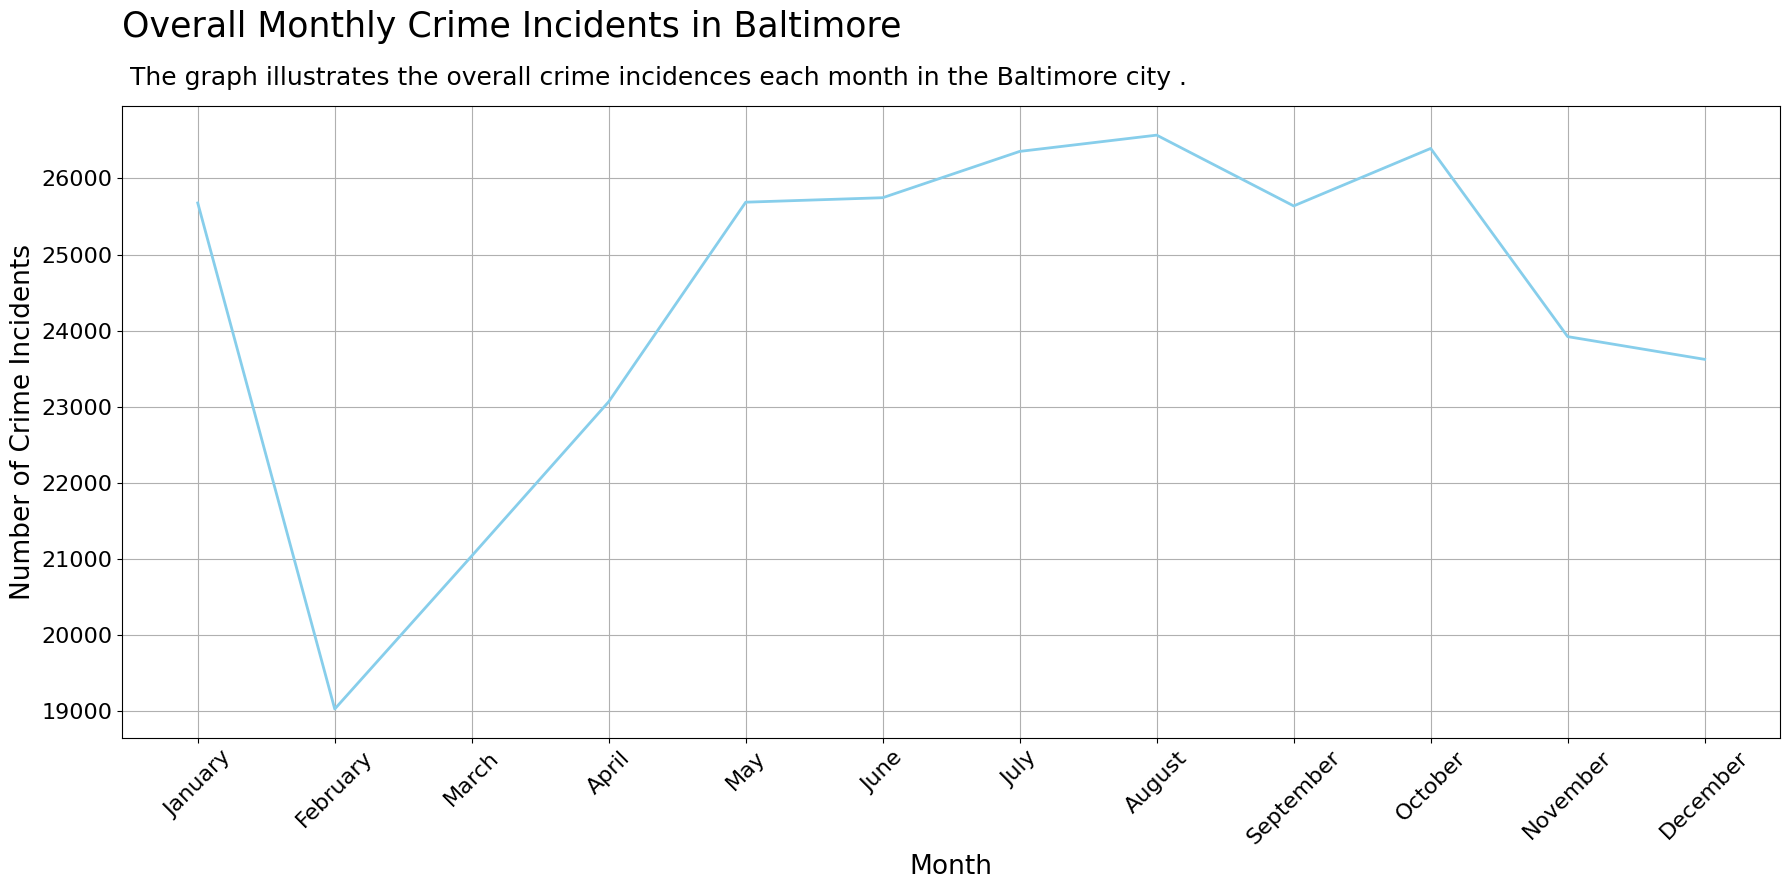

In [307]:
# Create the plots
plt.figure(figsize=(18, 9))
# Plot 2: Monthly line graph (overall across all years)
#plt.subplot(1, 3, 2)
plt.plot(monthly_data.index, monthly_data.values, color='skyblue', linestyle='-', linewidth=2, markersize=6)
plt.title('Overall Monthly Crime Incidents in Baltimore', fontsize=25, pad=50, loc='left', x=0)
plt.text(x=0.075, y=plt.gca().get_position().y1 + 0.02, s='The graph illustrates the overall crime incidences each month in the Baltimore city .', ha='left', fontsize=18, transform=plt.gcf().transFigure)
plt.xlabel('Month', fontsize=19)
plt.ylabel('Number of Crime Incidents', fontsize=19)

# Create a list of month names corresponding to each month (1-12)
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.xticks(monthly_data.index, month_names, rotation=45, fontsize=16)  # Use month names for x-ticks
plt.yticks(fontsize=16)  # Increase y-ticks size
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()

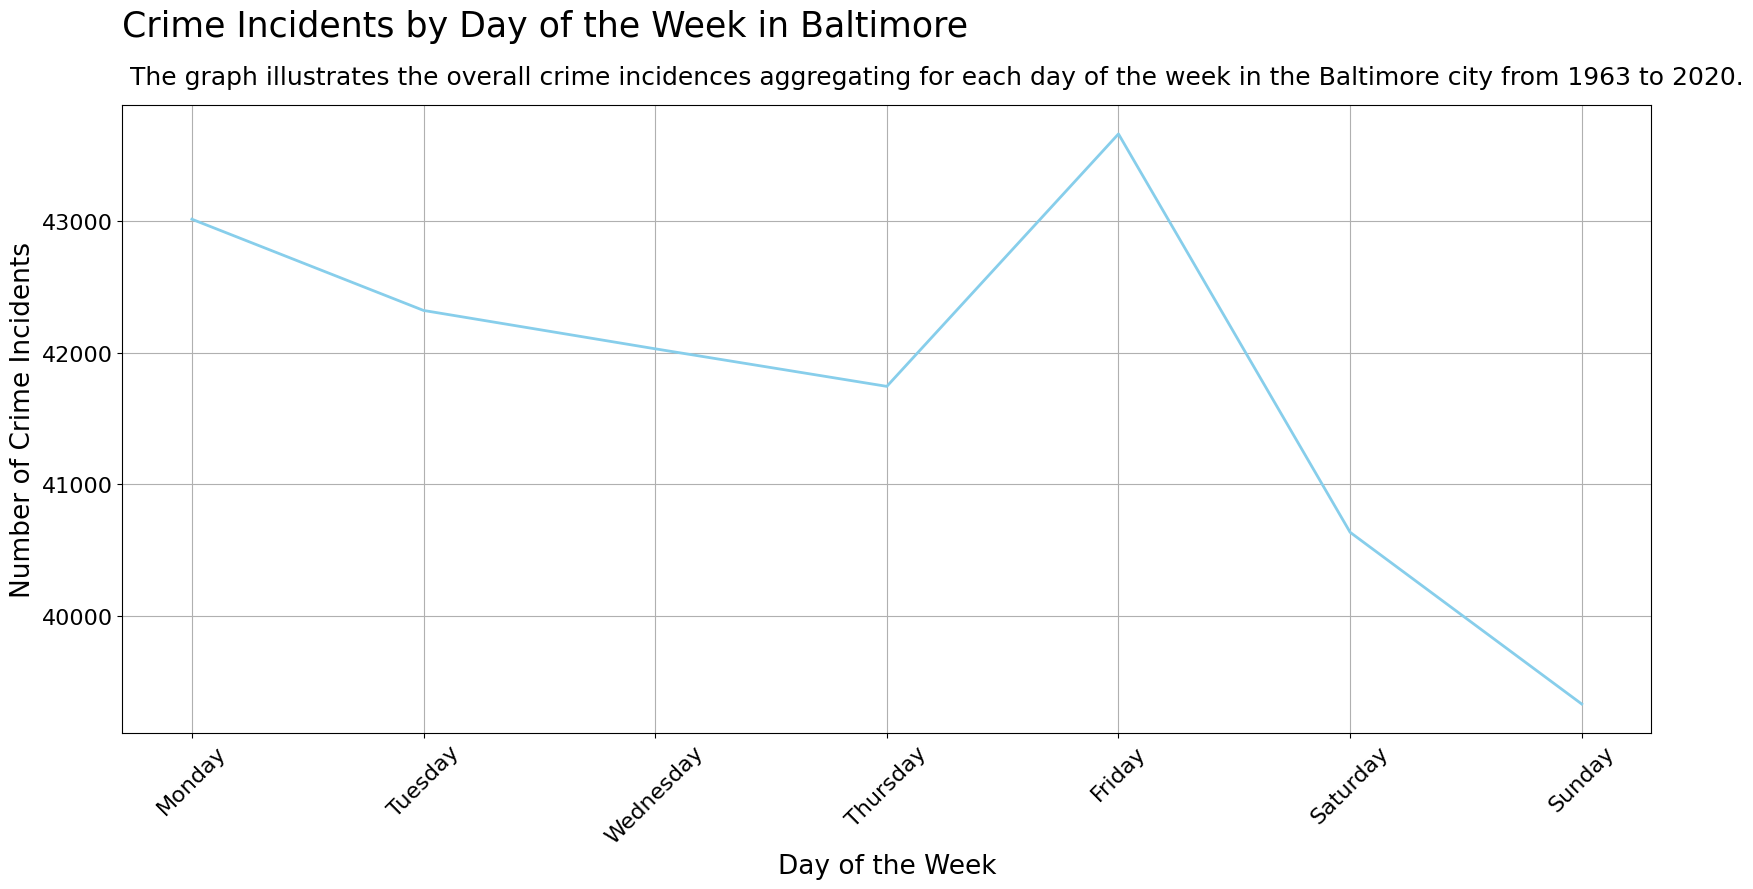

In [313]:
# Create the plots
plt.figure(figsize=(18, 9))
# Plot 3: Day of the week line graph
#plt.subplot(1, 3, 3)
plt.plot(weekly_data.index, weekly_data.values, color='skyblue', linestyle='-', linewidth=2, markersize=6)
plt.title('Crime Incidents by Day of the Week in Baltimore', fontsize=25, pad=50, loc='left', x=0)
plt.text(x=0.075, y=plt.gca().get_position().y1 + 0.02, s='The graph illustrates the overall crime incidences aggregating for each day of the week in the Baltimore city from 1963 to 2020.', ha='left', fontsize=18, transform=plt.gcf().transFigure)

plt.xlabel('Day of the Week', fontsize=19)
plt.ylabel('Number of Crime Incidents', fontsize=19)
plt.xticks(rotation=45, fontsize=16)  # Horizontal x-ticks with increased size
plt.yticks(fontsize=16)  # Increase y-ticks size
plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()


## Distribution of crime type aggregating from all geo-locations and all time periods

In [69]:
# Aggregate data based on the 'Description' column (crime type)
crime_type_data = df.groupby('Description')['Total Incidents'].sum().sort_values(ascending=False)

# Display the aggregated results
print(crime_type_data)


Description
LARCENY                 65508
COMMON ASSAULT          48061
BURGLARY                42237
LARCENY FROM AUTO       38977
AGG. ASSAULT            31706
AUTO THEFT              25832
ROBBERY - STREET        20779
ROBBERY - COMMERCIAL     5190
SHOOTING                 3869
ROBBERY - RESIDENCE      2984
ROBBERY - CARJACKING     2554
HOMICIDE                 1902
RAPE                     1891
ARSON                    1271
Name: Total Incidents, dtype: int64


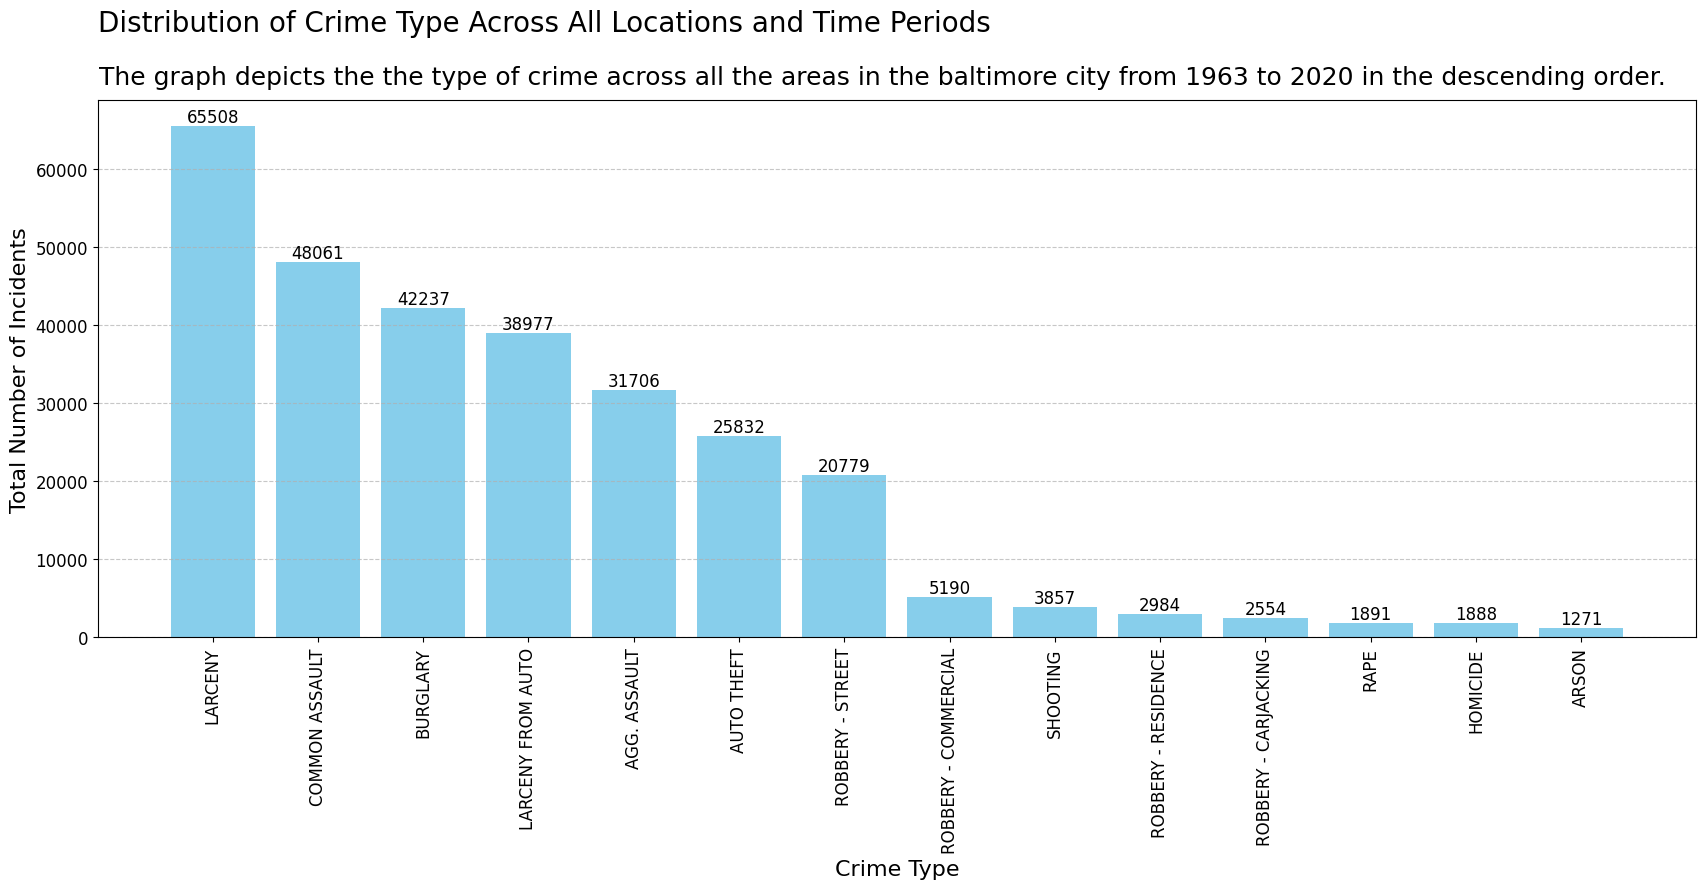

In [326]:
# Step 1: Aggregate data based on the 'Description' column (crime type)
crime_type_data = df.groupby('Description')['Total Incidents'].sum().sort_values(ascending=False)

# Step 2: Plot a bar graph for the aggregated data
plt.figure(figsize=(18, 9))

# Plotting the bar graph
bars = plt.bar(crime_type_data.index, crime_type_data.values, color='skyblue')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, str(yval), ha='center', va='bottom', fontsize=12)

# Step 3: Adding labels to the plot
plt.title('Distribution of Crime Type Across All Locations and Time Periods', fontsize=20, pad = 50, loc='left', x=0)
plt.text(x=0.067, y=plt.gca().get_position().y1 + 0.02, s='The graph depicts the the type of crime across all the areas in the baltimore city from 1963 to 2020 in the descending order.', ha='left', fontsize=18, transform=plt.gcf().transFigure)
plt.xlabel('Crime Type', fontsize=16)
plt.ylabel('Total Number of Incidents', fontsize=16)

# Step 4: Customizing the x-ticks for better readability
plt.xticks(rotation=90, ha='center', fontsize=12)  # Rotate x-axis labels to avoid overlap
plt.yticks(fontsize=12)  # Increase y-ticks size
# Step 5: Display grid for y-axis (horizontal lines only)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


## Illustrating how crime type distributions might vary from year-to-year, month-to-month, or by day-of-week aggregating across all locations.
#### using color blind friendly colors 

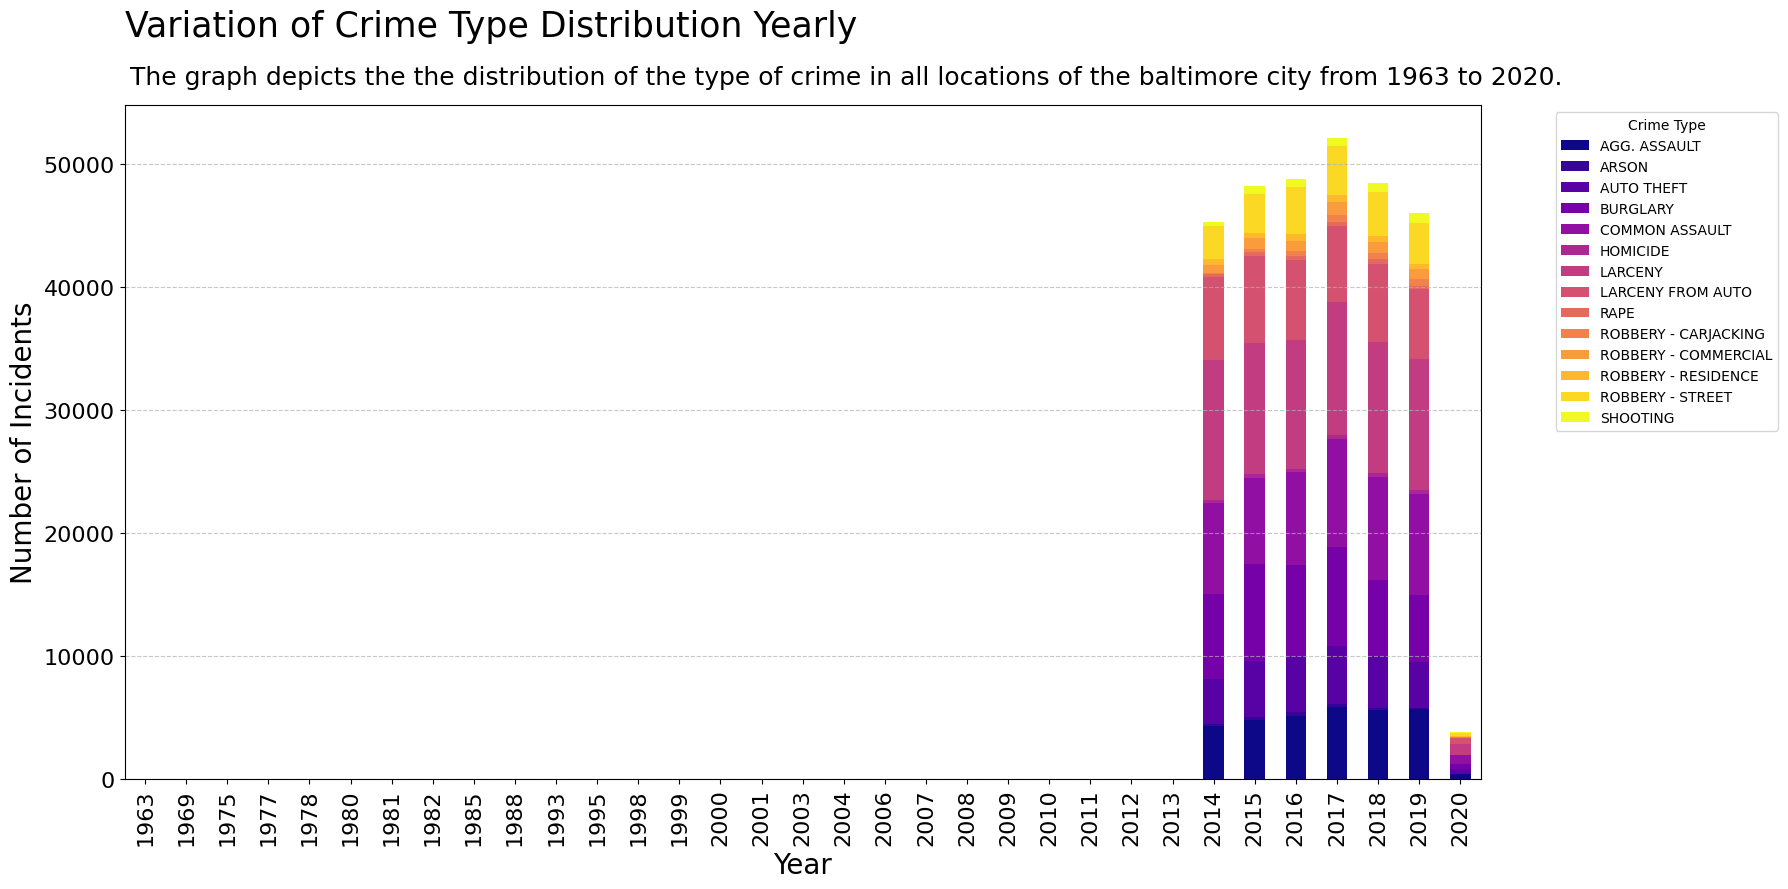

In [347]:
# Ensure you're working with a copy of the DataFrame
df = df.copy()
# Step 1: Combine CrimeDate and CrimeTime into a single datetime column
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDate'].astype(str) + ' ' + df['CrimeTime'], errors='coerce')

# Drop rows where CrimeDateTime is NaT
df = df.dropna(subset=['CrimeDateTime'])  # Ensure no NaT values before extracting year

# Step 2: Extract year, month, and day of the week
df['Year'] = df['CrimeDateTime'].dt.year.astype(int)  # Now convert to int
df['Month'] = df['CrimeDateTime'].dt.month_name()
df['DayOfWeek'] = df['CrimeDateTime'].dt.day_name()

# Step 3: Group data for each time period
yearly_data = df.groupby(['Year', 'Description'])['Total Incidents'].sum().unstack().fillna(0)
monthly_data = df.groupby(['Month', 'Description'])['Total Incidents'].sum().unstack().fillna(0)
weekly_data = df.groupby(['DayOfWeek', 'Description'])['Total Incidents'].sum().unstack().fillna(0)

# Sort data for proper order
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
weekly_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

monthly_data = monthly_data.reindex(monthly_order)
weekly_data = weekly_data.reindex(weekly_order)

# Step 4: Create the plots
plt.figure(figsize=(18, 9))

# Plot 1: Yearly stacked bar plot
yearly_data.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='plasma')
plt.title('Variation of Crime Type Distribution Yearly', fontsize=25, pad = 50, loc='left', x=0)
plt.text(x=0.075, y=plt.gca().get_position().y1 + 0.02, s='The graph depicts the the distribution of the type of crime in all locations of the baltimore city from 1963 to 2020.', ha='left', fontsize=18, transform=plt.gcf().transFigure)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Incidents', fontsize=20)
plt.xticks(rotation=0, fontsize=16)  # Horizontal x-ticks with increased size
plt.yticks(fontsize=16)  # Increase y-ticks size
plt.gca().set_xticklabels(yearly_data.index.astype(int), rotation=90)  # Ensure year labels are integers
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().xaxis.grid(False) 
# Adjust layout and show plot
plt.tight_layout()
plt.show()


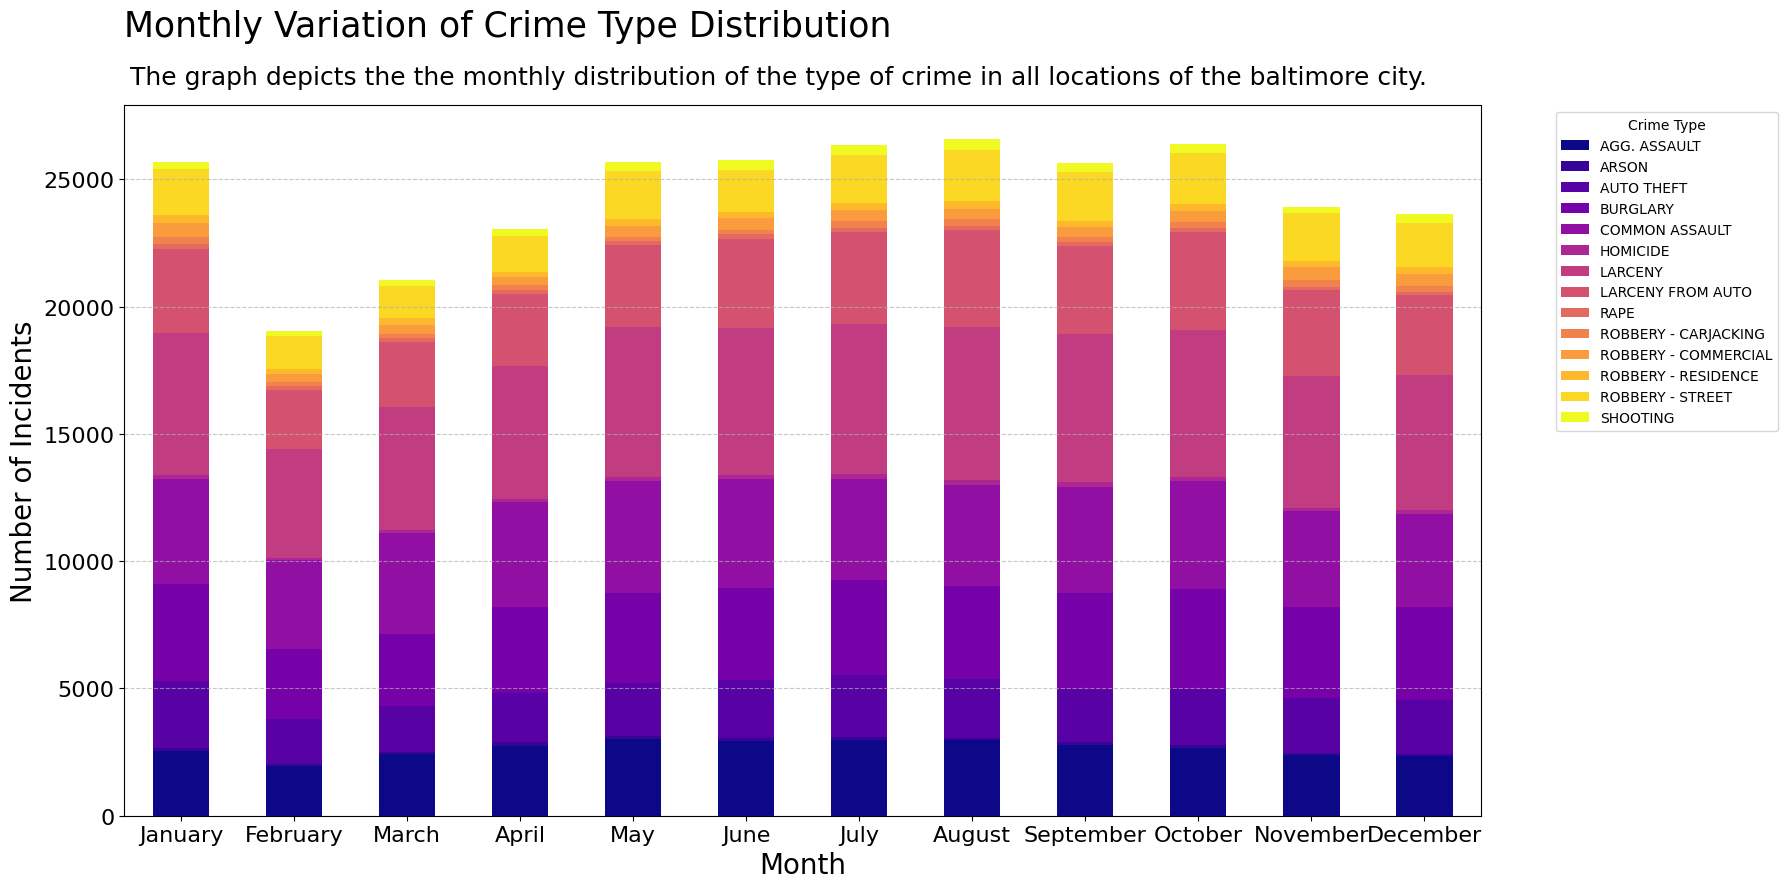

In [354]:
# Create larger plots
plt.figure(figsize=(18, 9))  # Increase figure size
# Plot 2: Monthly stacked bar plot
monthly_data.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='plasma')
plt.title('Monthly Variation of Crime Type Distribution', fontsize=25, pad = 50, loc='left', x=0)
plt.text(x=0.075, y=plt.gca().get_position().y1 + 0.02, s='The graph depicts the the monthly distribution of the type of crime in all locations of the baltimore city.', ha='left', fontsize=18, transform=plt.gcf().transFigure)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Number of Incidents',fontsize=20)
plt.xticks(rotation=0, fontsize=16)  # Horizontal x-ticks with increased size
plt.yticks(fontsize=16)  # Increase y-ticks size
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().xaxis.grid(False) 
# Adjust layout and show plot
plt.tight_layout()
plt.show()

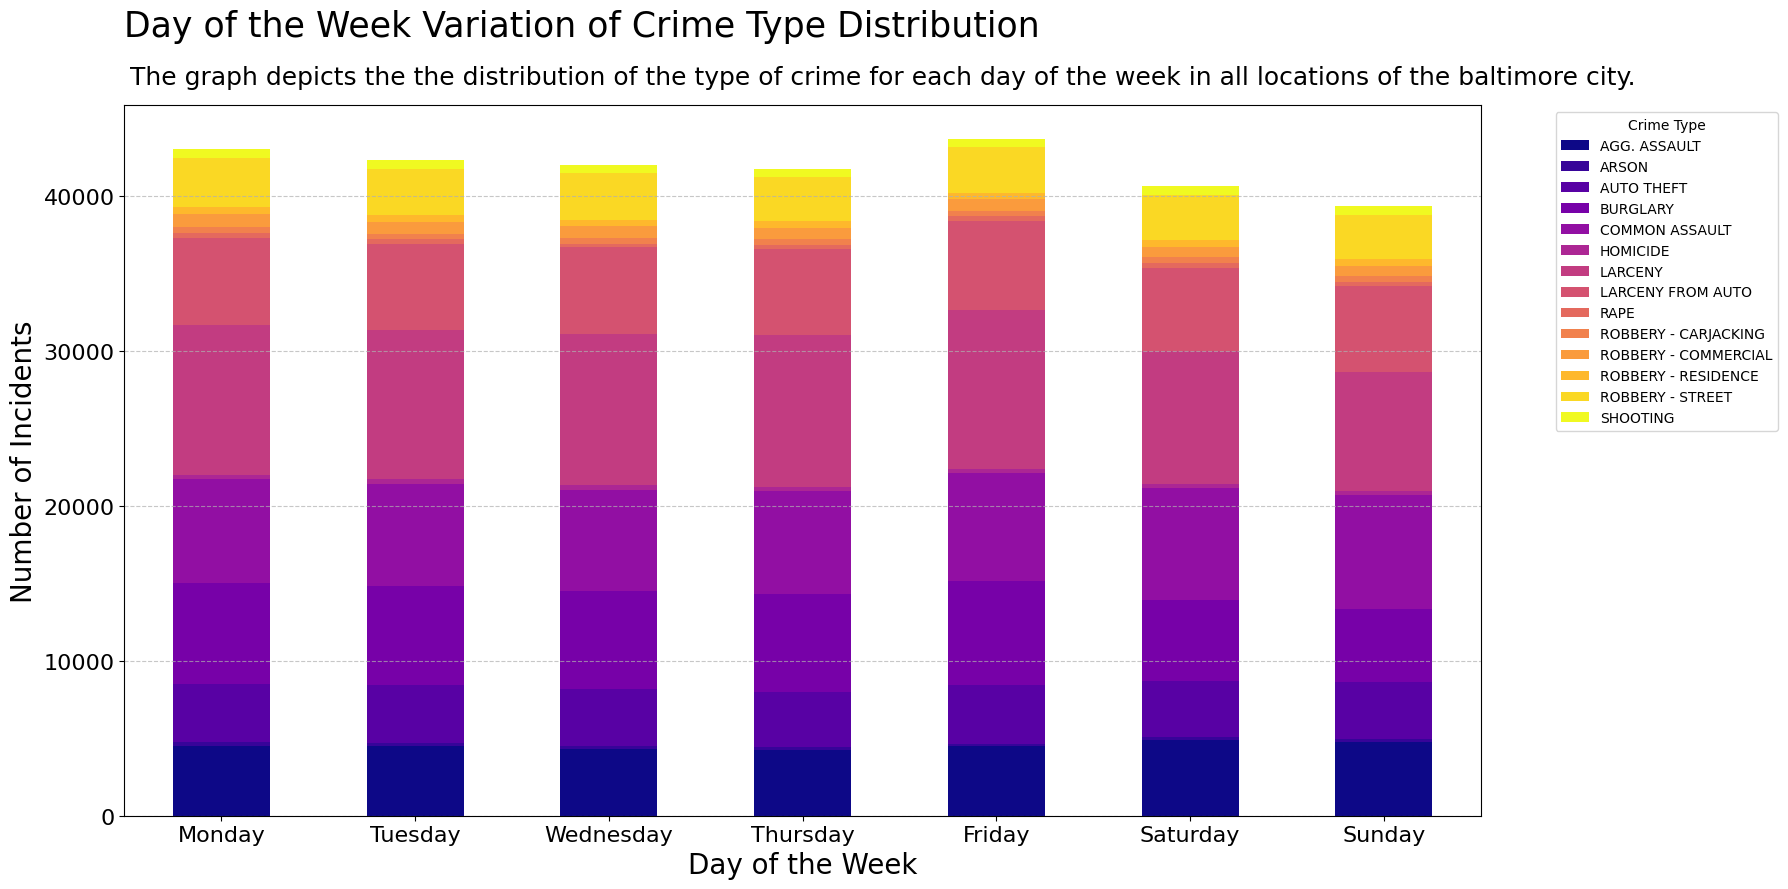

In [376]:
# Create larger plots
plt.figure(figsize=(18, 9))  # Increase figure size
# Plot 3: Day of the week stacked bar plot
weekly_data.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='plasma')
plt.title('Day of the Week Variation of Crime Type Distribution', fontsize=25, pad = 50, loc='left', x=0)
plt.text(x=0.075, y=plt.gca().get_position().y1 + 0.02, s='The graph depicts the the distribution of the type of crime for each day of the week in all locations of the baltimore city.', ha='left', fontsize=18, transform=plt.gcf().transFigure)
plt.xlabel('Day of the Week', fontsize=20)
plt.ylabel('Number of Incidents', fontsize=20)
plt.xticks(rotation=0, fontsize=16)  # Horizontal x-ticks with increased size
plt.yticks(fontsize=16)  # Increase y-ticks size
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().xaxis.grid(False) 
# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Dashboard that allows users to explore the spatial and temporal patterns of crime.
#### Plotting graphs by considering weapon and Inside/Outside attributes

In [38]:
pip install dash pandas plotly geopandas

Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install dash pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [373]:
import plotly.express as px
import plotly.graph_objs as go
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd

# Pre-processing the Inside/Outside column
df['InsideOutsideNormalized'] = df['Inside/Outside'].replace({'I': 'Inside', 'inside': 'Inside', 'O': 'Outside', 'outside': 'Outside'})

# Create unique options for Inside/Outside dropdown, ensuring no NaN values
inside_outside_options = [{'label': i_o, 'value': i_o} for i_o in df['InsideOutsideNormalized'].dropna().unique()]

# Create unique options for the weapon dropdown, ensuring no NaN values
weapon_options = [{'label': weapon, 'value': weapon} for weapon in df['Weapon'].dropna().unique()]

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Baltimore City Crime Patterns Dashboard"),
    
    # Dropdown for year selection
    html.Label('Select Year'),
    dcc.Dropdown(id='year-dropdown', options=[{'label': str(year), 'value': year} for year in df['Year'].unique()], value=df['Year'].min()),

    # Dropdown for district selection
    html.Label('Select District'),
    dcc.Dropdown(id='district-dropdown', options=[{'label': district, 'value': district} for district in df['District'].unique()], value=df['District'].unique()[0]),

    # Dropdown for weapon selection, using the cleaned options
    html.Label('Select Weapon'),
    dcc.Dropdown(id='weapon-dropdown', options=weapon_options, value=weapon_options[0]['value'] if weapon_options else None),

    # Dropdown for Inside/Outside selection, using the cleaned options
    html.Label('Select Inside/Outside'),
    dcc.Dropdown(id='inside-outside-dropdown', options=inside_outside_options, value='Inside'),

    # Temporal plots
    dcc.Graph(id='monthly-plot'),
    dcc.Graph(id='dayofweek-plot'),

    # Spatial plot
    dcc.Graph(id='spatial-plot'),
])

# Callback to update the plots based on selected filters
@app.callback(
    [Output('monthly-plot', 'figure'), Output('dayofweek-plot', 'figure'), Output('spatial-plot', 'figure')],
    [Input('year-dropdown', 'value'),
     Input('district-dropdown', 'value'),
     Input('weapon-dropdown', 'value'),
     Input('inside-outside-dropdown', 'value')]
)
def update_plots(selected_year, selected_district, selected_weapon, selected_inside_outside):
    # Filter dataset based on selections
    filtered_df = df[(df['Year'] == selected_year) &
                     (df['District'] == selected_district) &
                     (df['Weapon'] == selected_weapon) &
                     (df['InsideOutsideNormalized'] == selected_inside_outside)]
    
    # Group by month for monthly plot
    monthly_data = filtered_df.groupby(filtered_df['CrimeDateTime'].dt.month)['Total Incidents'].sum().reset_index()
    monthly_data.columns = ['Month', 'Total Incidents']  # Renaming for clarity
    monthly_data['Month'] = monthly_data['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
    monthly_data['Month'] = pd.Categorical(monthly_data['Month'], categories=[ 
        'January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
    monthly_title = f'Monthly Crime Incidents in {selected_district} ({selected_weapon}, {selected_inside_outside})'
    monthly_fig = px.line(monthly_data.sort_values('Month'), x='Month', y='Total Incidents', title=monthly_title)

    # Group by day of the week for day-of-week plot
    dayofweek_data = filtered_df.groupby(filtered_df['CrimeDateTime'].dt.day_name())['Total Incidents'].sum().reset_index()
    dayofweek_data.columns = ['Day', 'Total Incidents']
    dayofweek_data['Day'] = pd.Categorical(dayofweek_data['Day'], categories=[
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
    dayofweek_title = f'Day of Week Crime Incidents in {selected_district} ({selected_weapon}, {selected_inside_outside})'
    dayofweek_fig = px.line(dayofweek_data.sort_values('Day'), x='Day', y='Total Incidents', title=dayofweek_title)

    # Spatial plot
    if filtered_df.empty:
        spatial_fig = go.Figure()
    else:
        spatial_data = filtered_df.groupby(['Longitude', 'Latitude']).size().reset_index(name='Incidents')
        spatial_title = f'Spatial Distribution of Crime Incidents in {selected_district} ({selected_weapon}, {selected_inside_outside})'
        spatial_fig = px.scatter_mapbox(spatial_data, lat='Latitude', lon='Longitude', size='Incidents',
                                        color='Incidents', hover_name='Incidents',
                                        title=spatial_title, mapbox_style="open-street-map", size_max=15, zoom=10)

    # Customize plot aesthetics
    monthly_fig.update_layout(title_x=0.5, title_font_size=20, height=500)
    dayofweek_fig.update_layout(title_x=0.5, title_font_size=20, height=500)
    spatial_fig.update_layout(title_x=0.5, title_font_size=20, height=500)

    return monthly_fig, dayofweek_fig, spatial_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
